<a href="https://colab.research.google.com/github/knc6/jarvis/blob/master/jarvis/colab/compare_ml_algorithms_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of ML models for classification and regression without hyperparameter optimization

## Contents:
- Installing jarvis-tools and lightgbm
- Comparison of 10 different regressors, scatter-plots
- Comaprison of 8 different classifiers with an optional tolerance value as an input, ROC-curve
- Importance of pre-processing for some models


### Let's train classification and regression models for formation energies. A material will form if it has formation energy less than 0 and vice-versa. This can be an example of classifcation problem. Predicting exact values of formation energies is a regression  problem. We'll compare some well-known ML methods for these problems.

In [0]:
!pip install -U jarvis-tools lightgbm

In [2]:
from jarvis.db.static.explore_db import get_3d_dataset,get_2d_dataset,get_ml_dataset
from sklearn.model_selection import train_test_split
from jarvis.sklearn.build_models import jdata
from jarvis.sklearn.simple_models import simple_regression, binary_class_dat, bar_plot, simple_classification
from jarvis.db.static.explore_db import get_3d_dataset, get_2d_dataset, get_ml_dataset
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import lightgbm as lgb


WARNING!!!!: LightGBM is not installed, using sklearn GBM


In [3]:
X, Y, jid=jdata(prop='form_enp') # import data

Prop= form_enp 24759 24759


### For quick training let's just take 500 samples. As an exercise, train the whole dataset later  by commenting the following lines.

In [0]:
X=X[0:500]
Y=Y[0:500]

###Comparison of regression models

GaussianProcessRegressor 1.158 1.43
RandomForestRegressor 0.321 0.433
GradientBoostingRegressor 0.234 0.298
AdaBoostRegressor 0.379 0.456
SVR 0.29 0.406
Lasso 0.743 0.872
LinearRegression 1.065 1.357
KernelRidge 0.973 1.214
MLPRegressor 0.47 0.637
DecisionTreeRegressor 0.491 0.757


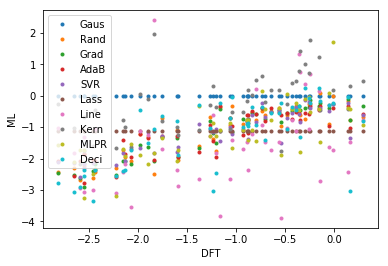

In [5]:
simple_regression(X,Y,plot=True)

### Exercise: check the effect of pre-processing

GaussianProcessRegressor 1.158 1.43
RandomForestRegressor 0.348 0.47
GradientBoostingRegressor 0.235 0.305
AdaBoostRegressor 0.355 0.445
SVR 0.735 0.878
Lasso 0.422 0.547
LinearRegression 0.926 1.304
KernelRidge 0.923 1.297
MLPRegressor 188.293 240.022
DecisionTreeRegressor 0.522 0.779


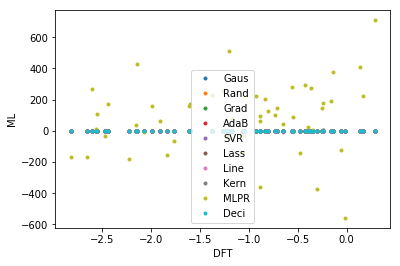

In [6]:
simple_regression(X,Y,preprocess=False,plot=True)

###Comparison of classification models  : 'tol' is the tolerance in values for classifying data

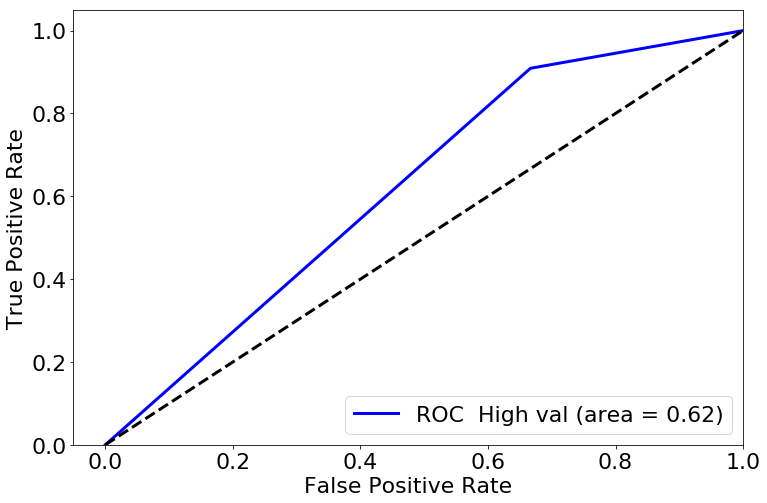

DecisionTreeClassifier 0.6212121212121212


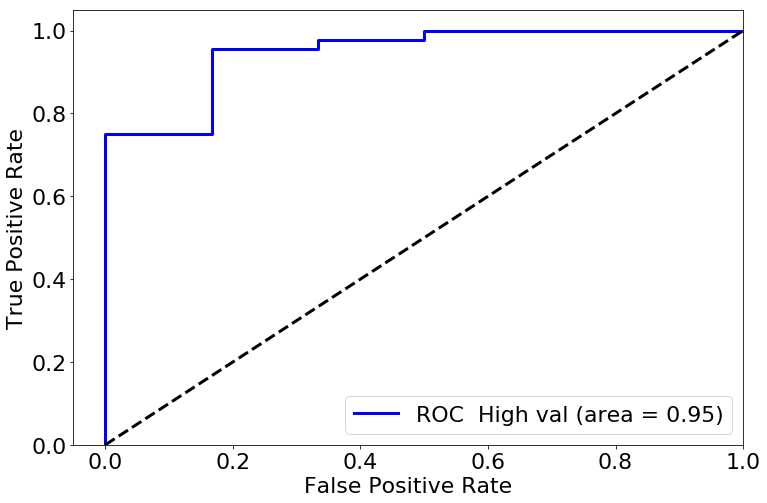

MLPClassifier 0.946969696969697


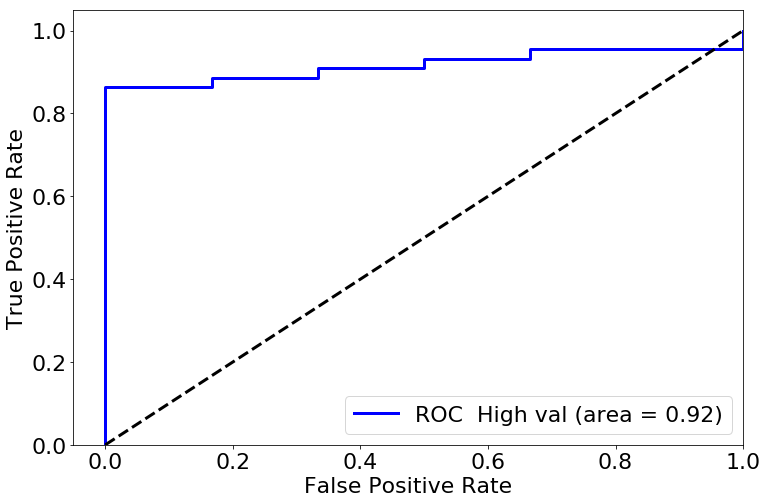

GradientBoostingClassifier 0.9166666666666666


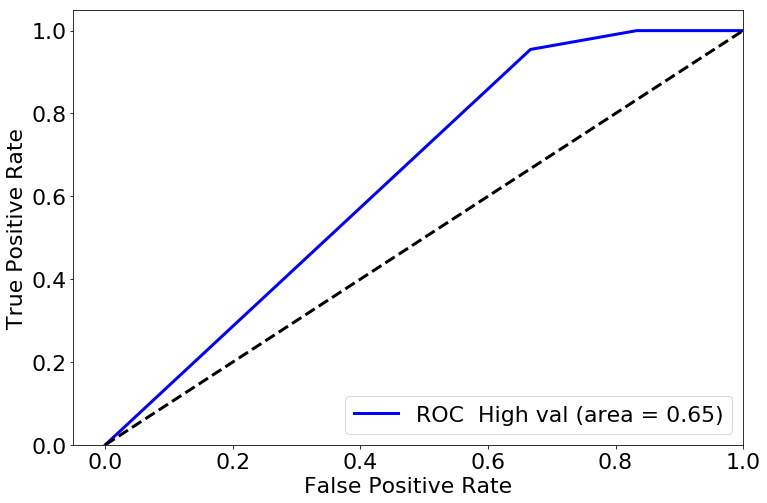

KNeighborsClassifier 0.6477272727272727


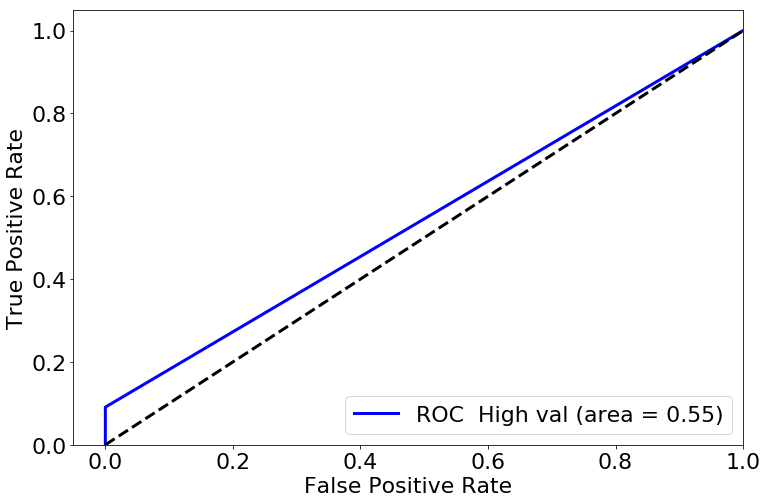

GaussianProcessClassifier 0.5454545454545454


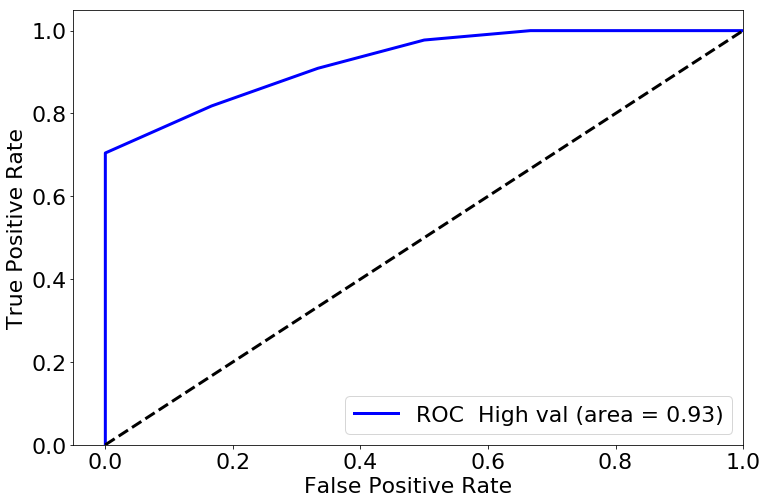

RandomForestClassifier 0.9261363636363636


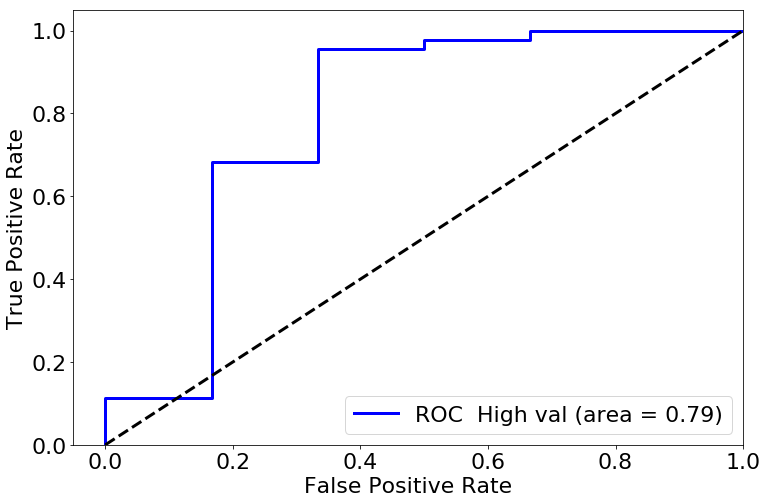

AdaBoostClassifier 0.7878787878787878


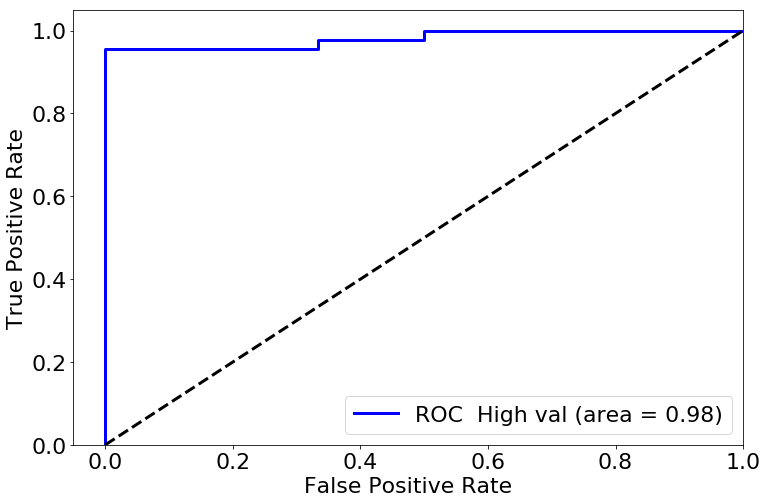

SVC 0.9810606060606061


In [7]:
simple_classification(X=X,Y=Y,tol=0, plot=True)